# Konwolucyjne siecie neuronowe

## Convolution neural networks, CNN

<br>

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtorwanie wygląda tak:

<img src="https://i.stack.imgur.com/FjvuN.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


### Jeszcze jednym istotnym parametrem jest rozmiar filtra.

# Przechodzimy do praktyki!

# Obrazki 2D (szare)

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [52]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils

In [33]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

In [34]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
        86.666664], dtype=float32)

In [35]:
X.shape

(1288, 1850)

In [36]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [37]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [38]:
# przygotowanie y
y = np_utils.to_categorical(y)
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
n_classes = y.shape[1]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])

In [42]:
X_train.shape

(772, 50, 37, 1)

In [43]:
# skalowanie X

X_train = X_train/225
X_test = X_test/225

In [44]:
import matplotlib.pyplot as plt

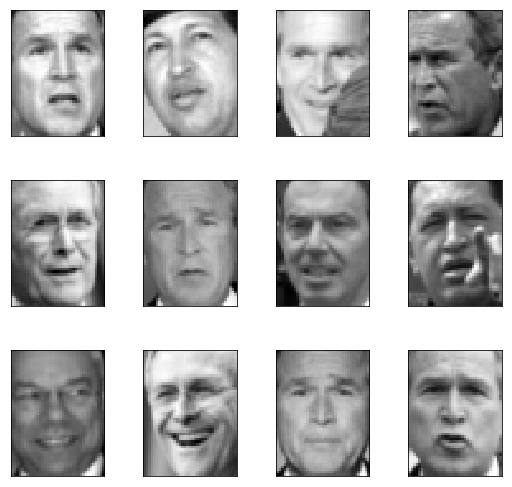

In [45]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [46]:
X_train.shape

(772, 50, 37, 1)

In [47]:
y_train.shape

(772, 7)

In [48]:
X_test.shape

(516, 50, 37, 1)

### Ćwiczenie 1. Punkt odniesienia

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwowa licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [51]:
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
X_train.shape[1:]

(50, 37, 1)

In [49]:
model = Sequential()
model.add(Flatten( input_shape = X_train.shape[1:] ))
model.add(Dense(n_classes, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 1850)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 12957     
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________


In [53]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 1.9103 - acc: 0.3368 - val_loss: 1.7469 - val_acc: 0.4301
Epoch 2/100
579/579 [==============================] - 0s 194us/step - loss: 1.7333 - acc: 0.3990 - val_loss: 1.6365 - val_acc: 0.4301
Epoch 3/100
579/579 [==============================] - 0s 163us/step - loss: 1.5870 - acc: 0.4197 - val_loss: 1.5294 - val_acc: 0.5078
Epoch 4/100
579/579 [==============================] - 0s 202us/step - loss: 1.5140 - acc: 0.4629 - val_loss: 1.5639 - val_acc: 0.4301
Epoch 5/100
579/579 [==============================] - 0s 153us/step - loss: 1.4750 - acc: 0.4663 - val_loss: 1.4774 - val_acc: 0.5181
Epoch 6/100
579/579 [==============================] - 0s 191us/step - loss: 1.4069 - acc: 0.5181 - val_loss: 1.4073 - val_acc: 0.4870
Epoch 7/100
579/579 [==============================] - 0s 190us/step - loss: 1.4331 - acc: 0.4715 - val_loss: 1.4152 - val_acc: 0.5492
Epoch 8/100

In [27]:
model.evaluate(X_test, y_test)

516/516 [==============================] - 0s 71us/step


[1.1011483475219372, 0.6375968992248062]

In [28]:
y_test.mean(0)

array([0.06395349, 0.18023255, 0.09883721, 0.4127907 , 0.0872093 ,
       0.03488372, 0.12209302], dtype=float32)

In [29]:
model = Sequential()
model.add(Flatten( input_shape = X_train.shape[1:] ))
model.add(Dense(100, activation="relu"))
model.add(Dense(n_classes, activation="softmax"))
print(model.summary())

early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               185100    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 884us/step - loss: 2.0408 - acc: 0.3610 - val_loss: 1.7039 - val_acc: 0.4249
Epoch 2/100
579/579 [==============================] - 0s 247us/step - loss: 1.7093 - acc: 0.4007 - val_loss: 1.6048 - val_acc: 0.4560
Epoch 3/100
579/579 [==============================] - 0s 246us/step - loss: 1.

In [30]:
model.evaluate(X_test, y_test)

516/516 [==============================] - 0s 106us/step


[1.0604439234548761, 0.6124031007751938]

### convolutional

In [31]:
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [32]:
?Conv2D

In [37]:
model = Sequential()
model.add( Conv2D(16,(3,3), input_shape=X_train.shape[1:]) )
model.add( Flatten() )
model.add( Dense(n_classes, activation="softmax") )
model.summary()
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
flatten_5 (Flatten)          (None, 26880)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 188167    
Total params: 188,327
Trainable params: 188,327
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 2.6353 - acc: 0.3368 - val_loss: 1.6999 - val_acc: 0.4197
Epoch 2/100
579/579 [==============================] - 0s 719us/step - loss: 1.7247 - acc: 0.4542 - val_loss: 1.5663 - val_acc: 0.4767
Epoch 3/100
579/579 [==============================] - 0s 656us/step - loss: 1.4525 - 

In [38]:
model.evaluate(X_test, y_test)

516/516 [==============================] - 0s 268us/step


[0.7704246164292328, 0.7558139534883721]

---

In [39]:
model = Sequential()
model.add( Conv2D(16,(3,3), input_shape=X_train.shape[1:]) )
model.add( MaxPooling2D((2,2)) )
model.add( Flatten() )
model.add( Dense(n_classes, activation="softmax") )
model.summary()
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 45703     
Total params: 45,863
Trainable params: 45,863
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 1.7196 - acc: 0.4128 - val_loss: 1.6771 - val_acc: 0.3057
Epoch 2/100
579/579 [==============================] - 0s 585us/step - loss: 1.5948 - acc: 

[0.6942874008370924, 0.7751937984496124]

---

In [40]:
model = Sequential()
model.add( Conv2D(16,(3,3), input_shape=X_train.shape[1:], padding='same')  )
model.add( MaxPooling2D((2,2)) )
model.add( Flatten() )
model.add( Dense(n_classes, activation="softmax") )
model.summary()
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 37, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 18, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 50407     
Total params: 50,567
Trainable params: 50,567
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 1.8017 - acc: 0.3851 - val_loss: 1.6818 - val_acc: 0.3938
Epoch 2/100
579/579 [==============================] - 0s 577us/step - loss: 1.6536 - acc: 

[0.7595266759857651, 0.7577519379844961]

---

In [41]:
model = Sequential()
model.add( Conv2D(16,(3,3), input_shape=X_train.shape[1:], padding='same')  )
model.add( AveragePooling2D((2,2)) )
model.add( Flatten() )
model.add( Dense(n_classes, activation="softmax") )
model.summary()
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 37, 16)        160       
_________________________________________________________________
average_pooling2d_1 (Average (None, 25, 18, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 50407     
Total params: 50,567
Trainable params: 50,567
Non-trainable params: 0
_________________________________________________________________
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 1.8254 - acc: 0.3903 - val_loss: 1.6510 - val_acc: 0.4197
Epoch 2/100
579/579 [==============================] - 0s 589us/step - loss: 1.6181 - acc: 

[0.9668369210043619, 0.6782945736434108]

---

In [60]:
model = Sequential()

model.add( Conv2D(32,(3,3), input_shape=X_train.shape[1:], padding='same')  )
model.add( MaxPooling2D((2,2)) )

model.add( Conv2D(16,(3,3), input_shape=X_train.shape[1:], padding='same')  )
model.add( MaxPooling2D((2,2)) )

model.add( Flatten() )
model.add( Dense(n_classes, activation="softmax") )
model.summary()
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 7175      
Total params: 12,695
Trainable params: 12,695
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_29 to have 2 dimensions, but got array with shape (7000, 4, 2)

<br>

# Case study 2

# Obrazki 3d (kolorowe - RGB)

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ...
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ...
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ...
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ...

 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ...
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ...
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ...
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


/home/olszewskip/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


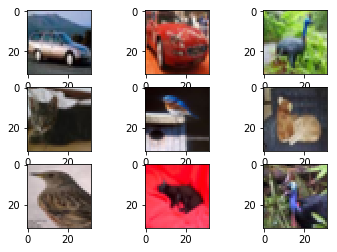

In [62]:
from keras.datasets import cifar10
from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(X_train[i]))
# show the plot
plt.show()

In [63]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/225
X_test = X_test/225

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(32, 32, 3)

### Zadanie 1. Zbuduj jednowarstwową siec konwolucyjną z maxpoolingiem.

Liczba filtrów: 32; rozmiar filtra: 5x5.

### Zadanie 2. Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [52]:
num_classes

4

In [47]:
X_train.shape[1:]

(32, 32, 3)

In [64]:
model = Sequential()

model.add( Conv2D(6,(5,5), input_shape=X_train[0].shape, padding='valid')  )
model.add( MaxPooling2D((2,2)) )

model.add( Conv2D(16,(5,5), padding='valid')  )
model.add( MaxPooling2D((2,2)) )

model.add( Flatten() )

model.add( Dense(120, activation="relu") )
model.add( Dense(84, activation="relu") )
model.add( Dense(num_classes, activation="softmax") )
model.summary()
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_31 (Dense)             (None, 84)                10164     
__________

[0.9189577610492706, 0.70525]

In [65]:
model.predict_classes(X_test)

array([2, 2, 1, ..., 3, 3, 3])

---

### Transfer learning

In [3]:
from keras.applications import VGG16

In [4]:
base_model = VGG16(weights='imagenet', include_top=False)

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

---

https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975

In [28]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 15
0

train_data_dir = 'Dane/data/train'
validation_data_dir = 'Dane/data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# added:
# input_tensor = Input(shape=(150,150,3))
# end of added

# added: input_shape = (img_width, img_height, 3) below

# build the VGG16 network

# input_tensor = Input(shape=(img_width, img_height, 3))

h, w = 150, 150

model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(h, w, 3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape= model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
# top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)
model_transfer.summary()

Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_18 (Sequential)   (None, 1)                 2097665   
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_transfer.layers[0].trainable = False

In [31]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model_transfer.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
nb_val_samples=nb_validation_samples)


Found 1607 images belonging to 2 classes.
Found 363 images belonging to 2 classes.


/home/olszewskip/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/olszewskip/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=<keras_pre..., steps_per_epoch=125, validation_steps=800)`


RuntimeError: You must compile your model before using it.

In [21]:
h,w = 150, 150

model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))



top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 2097665   
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


---

### twarze

In [54]:
model = Sequential()
model.add(Flatten( input_shape = X_train.shape[1:] ))
model.add(Dense(100, activation="relu"))
model.add(Dense(n_classes, activation="softmax"))
print(model.summary())

early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 1850)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               185100    
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
None
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 2.0738 - acc: 0.3333 - val_loss: 1.6483 - val_acc: 0.4301
Epoch 2/100
579/579 [==============================] - 0s 306us/step - loss: 1.6614 - acc: 0.3972 - val_loss: 1.7051 - val_acc: 0.2694
Epoch 3/100
579/579 [==============================] - 0s 286us/step - loss: 1.62

[0.8711593077164288, 0.7015503875968992]

In [ ]:
# graph API

In [56]:
from keras.models import Model
from keras.layers import Input

In [58]:
input_data = Input(shape = X_train.shape[1:])
flatten = Flatten()(input_data)
dense = Dense(100, activation='relu')(flatten)
classify = Dense(n_classes, activation='softmax')(dense)

model = Model(inputs=input_data, outputs=classify)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 50, 37, 1)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1850)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               185100    
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________


In [59]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 1ms/step - loss: 1.9402 - acc: 0.3851 - val_loss: 1.7134 - val_acc: 0.4456
Epoch 2/100
579/579 [==============================] - 0s 303us/step - loss: 1.6884 - acc: 0.4231 - val_loss: 1.5118 - val_acc: 0.4767
Epoch 3/100
579/579 [==============================] - 0s 275us/step - loss: 1.5870 - acc: 0.4456 - val_loss: 1.5539 - val_acc: 0.4352
Epoch 4/100
579/579 [==============================] - 0s 241us/step - loss: 1.4745 - acc: 0.4456 - val_loss: 1.4815 - val_acc: 0.4922
Epoch 5/100
579/579 [==============================] - 0s 257us/step - loss: 1.4372 - acc: 0.4629 - val_loss: 1.4628 - val_acc: 0.5181
Epoch 6/100
579/579 [==============================] - 0s 243us/step - loss: 1.4549 - acc: 0.4940 - val_loss: 1.3923 - val_acc: 0.5130
Epoch 7/100
579/579 [==============================] - 0s 258us/step - loss: 1.3449 - acc: 0.4888 - val_loss: 1.4609 - val_acc: 0.5337
Epoch 8/100

[1.30296668803045, 0.563953488372093]

---

In [60]:
from keras.layers import Concatenate

In [61]:
input_data = Input(shape = X_train.shape[1:])
flatten = Flatten()(input_data)
branch1_dense = Dense(10, activation='relu')(flatten)
branch1_dense = Dense(10, activation='relu')(branch1_dense)

branch2_dense = Dense(10, activation='relu')(flatten)
branch2_dense = Dense(10, activation='relu')(branch2_dense)

concat = Concatenate()([branch1_dense, branch2_dense])

classify = Dense(50, activation='relu')(concat)
classify = Dense(n_classes, activation='softmax')(classify)

model = Model(inputs=input_data, outputs=classify)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 50, 37, 1)    0                                            
__________________________________________________________________________________________________
flatten_16 (Flatten)            (None, 1850)         0           input_17[0][0]                   
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 10)           18510       flatten_16[0][0]                 
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 10)           18510       flatten_16[0][0]                 
__________________________________________________________________________________________________
dense_31 (

In [62]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s 2ms/step - loss: 1.7805 - acc: 0.3541 - val_loss: 1.6735 - val_acc: 0.4301
Epoch 2/100
579/579 [==============================] - 0s 217us/step - loss: 1.7088 - acc: 0.4059 - val_loss: 1.6414 - val_acc: 0.4301
Epoch 3/100
579/579 [==============================] - 0s 218us/step - loss: 1.7051 - acc: 0.4059 - val_loss: 1.6195 - val_acc: 0.4301
Epoch 4/100
579/579 [==============================] - 0s 207us/step - loss: 1.6757 - acc: 0.4059 - val_loss: 1.6043 - val_acc: 0.4301
Epoch 5/100
579/579 [==============================] - 0s 193us/step - loss: 1.6606 - acc: 0.4059 - val_loss: 1.6083 - val_acc: 0.4301
Epoch 6/100
579/579 [==============================] - 0s 199us/step - loss: 1.6636 - acc: 0.4059 - val_loss: 1.6163 - val_acc: 0.4456
Epoch 7/100
579/579 [==============================] - 0s 207us/step - loss: 1.6374 - acc: 0.4180 - val_loss: 1.5709 - val_acc: 0.4301
Epoch 8/100

[1.3139830504276955, 0.5135658914728682]

---

In [ ]:
obrazek = Input(shape=...)
tekst = Input(...)
...
...
output = Dense(1)

model = Model(inputs=[obrazek, tekst], outputs=output)

model.fit([obrazki_train, teksty_train], y_train)

---

In [64]:
h, w = 150, 150
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(h,w,3))

In [67]:
base_model.layers[6].output

<tf.Tensor 'block2_pool_14/MaxPool:0' shape=(?, 37, 37, 128) dtype=float32>

In [68]:
wejscie = base_model.input

cechy_vgg = base_model.layers[6].output

classify = Flatten()(cechy_vgg)
classify = Dense(50)(classify)
output = Dense(n_classes, activation='softmax')(classify)

model = Model(inputs = wejscie, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________